![logo](https://github.com/donatellacea/DL_tutorials/blob/main/notebooks/figures/1128-191-max.png?raw=true)

# Dataset: California Housing

In this Notebook we will show you how to analyse and properly preprocess the California Housing dataset. 

--------

## Getting Started

### Setup Colab environment

If you installed the packages and requirments on your own machine, you can skip this section and start from the import section.
Otherwise you can follow and execute the tutorial on your browser. In order to start working on the notebook, click on the following button, this will open this page in the Colab environment and you will be able to execute the code on your own.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/HelmholtzAI-Consultants-Munich/XAI-Tutorials/blob/main/data_and_models/Dataset-Housing.ipynb)



Now that you are visualizing the notebook in Colab, run the next cell to install the packages we will use.
There are few things you should follow in order to properly set the notebook up:

1. Warning: This notebook was not authored by Google. *Click* on 'Run anyway'.
2. When the installation commands are done, there might be "Restart runtime" button at the end of the output. Please, *click* it. 

In [1]:
# no additional installations needed

By running the next cell you are going to create a folder in your Google Drive. All the files for this tutorial will be uploaded to this folder. After the first execution you might receive some warning and notification, please follow these instructions:
1. Permit this notebook to access your Google Drive files? *Click* on 'Yes', and select your account.
2. Google Drive for desktop wants to access your Google Account. *Click* on 'Allow'.

At this point, a folder has been created and you can navigate it through the lefthand panel in Colab, you might also have received an email that informs you about the access on your Google Drive. 

In [2]:
# Create a folder in your Google Drive
# from google.colab import drive                                                                          
# drive.mount('/content/drive')

In [3]:
# %cd drive/MyDrive

In [4]:
# Don't run this cell if you already cloned the repo 
# !git clone https://github.com/HelmholtzAI-Consultants-Munich/XAI-Tutorials.git

In [5]:
# %cd XAI-Tutorials

### Imports

Let's start with importing all required Python packages.

In [6]:
# Load the required packages
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

We fix the random seeds to ensure reproducible results, as we work with (pseudo) random numbers.

In [7]:
# assert reproducible random number generation
seed = 1
np.random.seed(seed)

--------

## The California Housing Dataset

In this notebook, we will work with the **California Housing dataset**, containing 20,640 median house values for California districts (expressed in $100,000), which are described by 8 numeric feature. Each row in the dataset represents a block of houses, not a single household. The data pertains to the house prices found in a given California district and some summary statistics about them based on the 1990 census data.

<center><img src="https://github.com/HelmholtzAI-Consultants-Munich/XAI-Tutorials/blob/main/docs/source/_figures/dataset_california_housing.jpg?raw=true" width="900" /></center>

<font size=1> Source: [Link](https://www.kaggle.com/datasets/harrywang/housing)

In [8]:
# Load the data
data_housing = fetch_california_housing(as_frame=True)

Now, let's have a look at the description of the dataset:

In [9]:
print(data_housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

### Exploratory Data Analysis

Exploratory data analysis is a first important step to get an understanding of the data and to identify patterns and problems in the data. First, we will check how many samples and variables our dataset has and inspect the first few lines of our dataset:

In [10]:
# Get the dataframe
data_housing = data_housing.frame

# Inspect the data
print(f"The dataset has {data_housing.shape[1]} variables that describe {data_housing.shape[0]} house blocks.")
print(f"We have {data_housing.select_dtypes(include='object').shape[1]} categorical and {data_housing.select_dtypes(exclude='object').shape[1]} numerical variables.")

print("\nHere are the first few lines of our dataset:")
data_housing.head()

The dataset has 9 variables that describe 20640 house blocks.
We have 0 categorical and 9 numerical variables.

Here are the first few lines of our dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Next, we check if any values are missing:

In [11]:
print(data_housing.isnull().sum())

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


And last, we inspect how our variables are distributed:

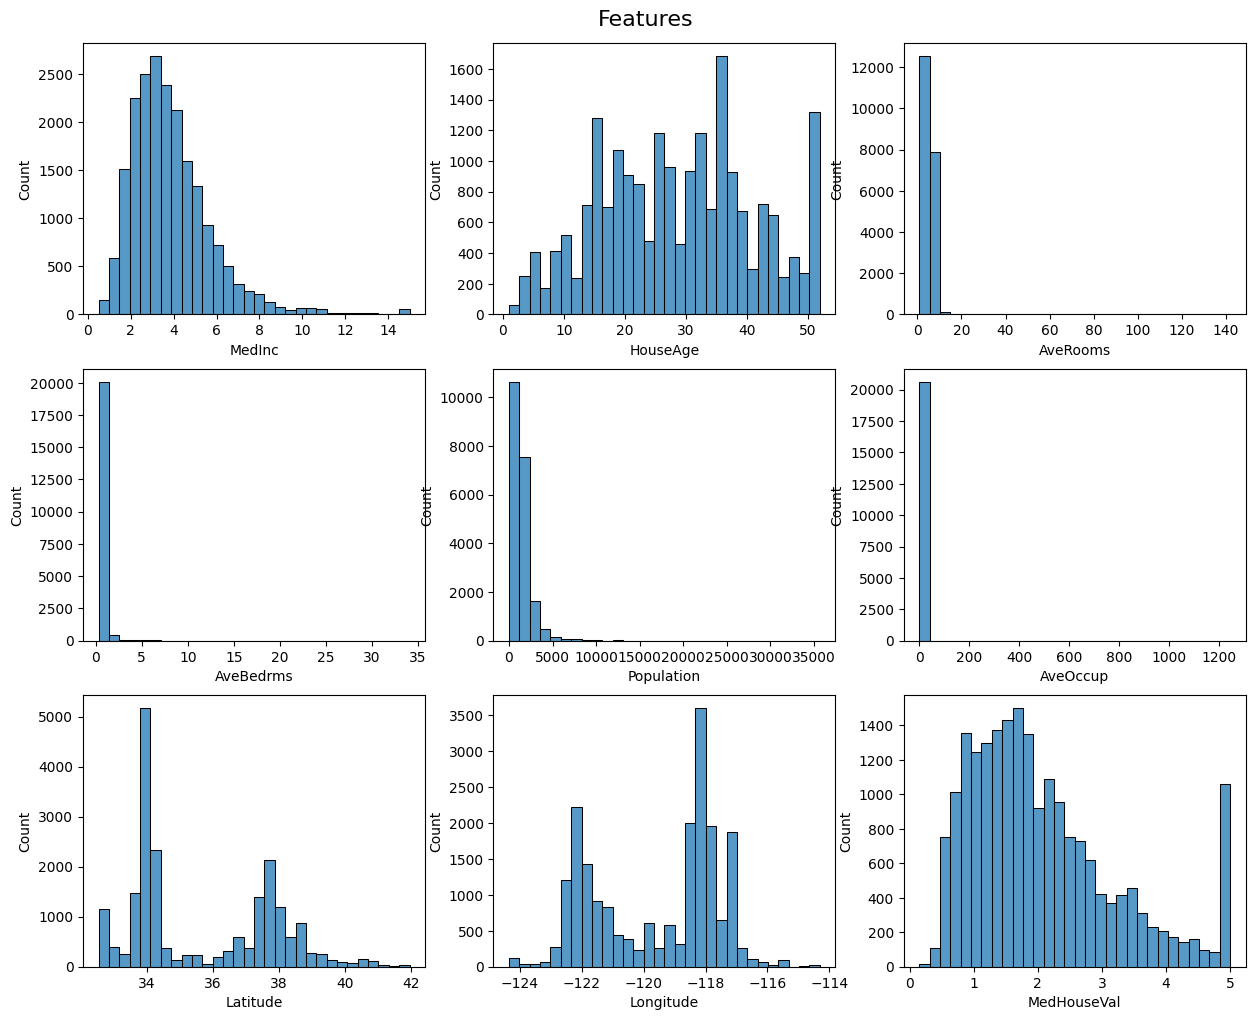

In [12]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15, 11))
fig.suptitle('Features', fontsize=16)
fig_col = 0
fig_row = 0

for col in data_housing.columns:
    if col != "target":
        sns.histplot(data=data_housing, x=col, bins=30, ax=axs[fig_row, fig_col])
    
    fig_col += 1
    if fig_col == 3:
        fig_col = 0
        fig_row += 1

plt.subplots_adjust(top=0.95) 

By examining the cells above, try to answer the following questions:

<font color='green'>

#### Question 1: Do we need to preprocess some features before modelling?

<font color='grey'>

#### Your Answer: 

No, there are no missing values and we have no categorical features that we need to encode.

Let's now save the dataset in a ``joblib`` file, such that we can load the preprocessed data into other notebooks later on.

In [13]:
# Save the data with joblib
data = data_housing
joblib.dump(data, open('./data_housing_preprocessed.joblib', 'wb'))